In [1]:
import random as rd
import pylab as pl
%matplotlib widget

## Appli ITC5.1 : Détermination d'un noyau

In [2]:
d={0:[1,2,3,4,5],1:[4,5,6],2:[1,3,4,5],3:[5,6,7],4:[7,8],5:[8],6:[5,7],7:[8],8:[]} 

print(d)

{0: [1, 2, 3, 4, 5], 1: [4, 5, 6], 2: [1, 3, 4, 5], 3: [5, 6, 7], 4: [7, 8], 5: [8], 6: [5, 7], 7: [8], 8: []}


In [3]:
def sans_successeur(d):
  for clef in d:
    if d[clef]==[]:
      return clef

print(sans_successeur(d))

8


In [4]:
def predecesseurs(d,j):
  pred=[]
  for clef in d:
    if j in d[clef] :
      pred.append(clef)
  return pred

predecesseurs(d,1)

[0, 2]

In [5]:
def supprime_sommet(d,j):
    # on retire le sommet de la liste des successeurs des sommets restants
    for clef in d:
        if j in d[clef]:
            d[clef].remove(j)
    # on retire le sommet de la liste des sommets
    d.pop(j)

In [6]:
def noyau(d):
  noy=[]  
  while d!={}:
    s=sans_successeur(d)
    noy.append(s)
    pred=[s]+predecesseurs(d,s)
    for som in pred:
        supprime_sommet(d,som)
  return noy
  
noyau(d)

[8, 6, 2]

## 3.1. Algorithme des $k$ plus proches voisins

On commence par définir la donnée, à savoir une ellipse de demi-grand axe 1.2 et de demi petit axe 0.4.
Les points à l'intérieur de cette ellipse sont rouges, les autres sont bleus



In [8]:
nbre_points_apprentissage=300

def est_rouge(x,y):
    return (x/0.8)**2 + (y/0.5)**2 < 1

lx_r,ly_r=[],[]
lx_b,ly_b=[],[]
for _ in range(nbre_points_apprentissage):
    x,y=rd.uniform(-1,1),rd.uniform(-1,1)
    if est_rouge(x,y):
        lx_r.append(x)
        ly_r.append(y)
    else:
        lx_b.append(x)
        ly_b.append(y)
        
donnees=[(lx_r[i],ly_r[i],"R") for i in range(len(lx_r))]+[(lx_b[i],ly_b[i],"B") for i in range(len(lx_b))]


#### Affichage de la distribution

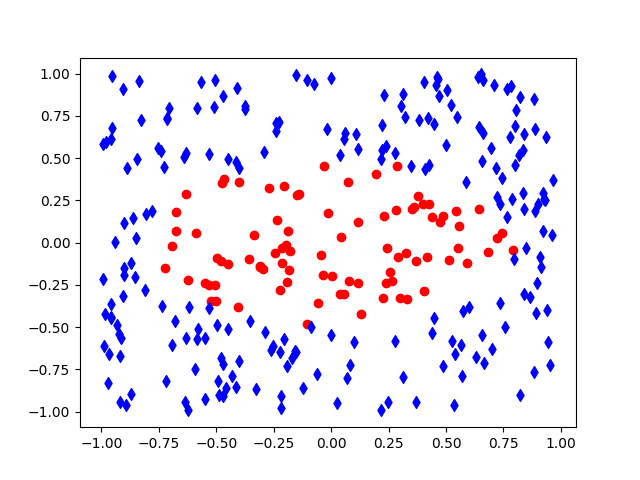

In [9]:

fix,ax=pl.subplots()
ax.scatter(lx_r,ly_r,c ="red", marker ="o",)
ax.scatter(lx_b,ly_b,c ="blue", marker ="d",)

### Mise en œuvre de l'algorithme

In [10]:
def plus_proches_voisins(M, k):
    x,y=M
    t = sorted(donnees, key=lambda d: (d[0]-x)**2 + (d[1]-y)**2)[:k]
    r = 0
    for X,Y,col in t:
        if col == "R":
            r += 1
    if 2 * r > k:
        return "R"
    return "B"



In [11]:
N=10000

def genere_graphe(k):
    lx_r,ly_r,lx_b,ly_b=[],[],[],[]
    for i in range(N):
        x,y=rd.uniform(-1,1),rd.uniform(-1,1)
        if plus_proches_voisins((x,y), k)=="R":
            lx_r.append(x)
            ly_r.append(y)
        else:
            lx_b.append(x)
            ly_b.append(y)
    return lx_r,ly_r,lx_b,ly_b


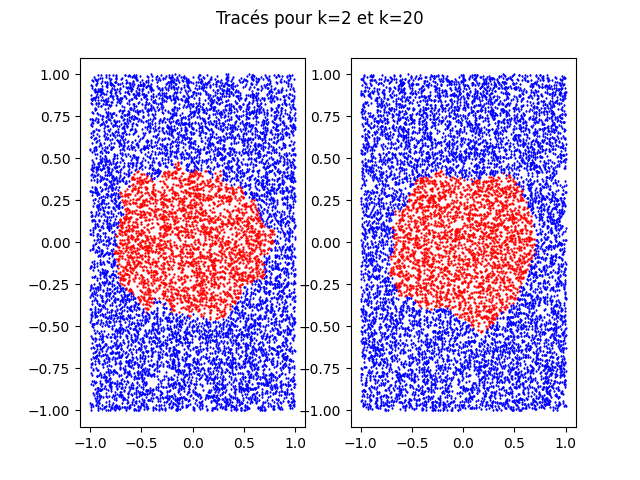

In [12]:
k1,k2=2,20

lx_r1,ly_r1,lx_b1,ly_b1=genere_graphe(k1)
lx_r2,ly_r2,lx_b2,ly_b2=genere_graphe(k2)
        
fig,(ax1,ax2)=pl.subplots(1,2)
ax1.scatter(lx_r1,ly_r1,c ="red", marker ="o",s=0.5)
ax1.scatter(lx_b1,ly_b1,c ="blue", marker ="d",s=0.5)
fig.suptitle("Tracés pour k={} et k={}".format(k1,k2))
ax2.scatter(lx_r2,ly_r2,c ="red", marker ="o",s=0.5)
ax2.scatter(lx_b2,ly_b2,c ="blue", marker ="d",s=0.5)

### Matrice de confusion

In [24]:
def construit_matrice_confusion(N,k):
    VP,VN,FP,FN=0,0,0,0
    for i in range(N):
        x,y=rd.uniform(-1,1),rd.uniform(-1,1)
        couleur_pPV=plus_proches_voisins((x,y), k)
        if est_rouge(x,y) and plus_proches_voisins((x,y), k)=='R':
            VP+=1
        elif est_rouge(x,y) and plus_proches_voisins((x,y), k)=='B':
            FN+=1
        elif plus_proches_voisins((x,y), k)=='B':
            VN+=1
        else:
            FP+=1
    return pl.array([[VP,FN],[FP,VN]])

for k in (2,3,4,10,30,100,1000):
    M=construit_matrice_confusion(100,k)
    print("Pour k={}, la matrice de confusion est \n{}, ce qui correspond à une efficacité de {}%.".format(k,M,100-(M[0][1]+M[1][0])))
    

Pour k=2, la matrice de confusion est 
[[29  5]
 [ 0 66]], ce qui correspond à une efficacité de 95%.
Pour k=3, la matrice de confusion est 
[[29  3]
 [ 1 67]], ce qui correspond à une efficacité de 96%.
Pour k=4, la matrice de confusion est 
[[35  6]
 [ 0 59]], ce qui correspond à une efficacité de 94%.
Pour k=10, la matrice de confusion est 
[[23  7]
 [ 0 70]], ce qui correspond à une efficacité de 93%.
Pour k=30, la matrice de confusion est 
[[25 12]
 [ 0 63]], ce qui correspond à une efficacité de 88%.
Pour k=100, la matrice de confusion est 
[[18 10]
 [ 0 72]], ce qui correspond à une efficacité de 90%.
Pour k=1000, la matrice de confusion est 
[[ 0 30]
 [ 0 70]], ce qui correspond à une efficacité de 70%.


# 3.2.2. Compression de données

In [25]:
import matplotlib.image as mpimg
img = mpimg.imread("./paysBasque.bmp")
img.shape

(302, 550, 3)

#### Détermination du nombre de couleurs 
On utilise un dictionnaire pour stocker les couleurs déjà rencontrées et on parcourt l'ensemble des pixels. Comme les clefs doivent être non-mutables, on convertit les listes en tuples

In [26]:
def trouve_couleur(img):
    dic={}
    lenx,leny,lenc=img.shape
    for x in range(lenx):
        for y in range(leny):
            clef=img[x,y][0],img[x,y][1],img[x,y][2]
            if clef not in dic:
                dic[clef]=1
    return len(dic)

trouve_couleur(img)   

39052

In [27]:
img.shape

(302, 550, 3)

In [28]:
def dist(p,q):
    return ((float(p[0])-float(q[0]))**2+(float(p[1])-float(q[1]))**2+(float(p[2])-float(q[2]))**2)**0.5

dist([0,0,0],[1,0,0])
    

1.0

In [29]:
def initialise(img,k):
    lenx,leny,lenc=img.shape
    l=[]
    for _ in range(k):
        x,y=rd.randint(0,lenx),rd.randint(0,leny)
        l.append(img[x,y])
    return pl.array(l,dtype='int64')

initialise(img,5)
        

array([[182, 223, 227],
       [ 62,  82, 119],
       [182, 223, 227],
       [205, 183, 110],
       [191, 222, 207]])

In [30]:
def barycentre(img,s):
    N=max(1,len(s))
    pixel=pl.array([0,0,0])
    for i in range(N):
        pixel+=img[s[i]]
    pixel=pixel/N
    return [int(pix) for pix in pixel]

barycentre(img,((0,1),(13,5),(125,3)))

[139, 161, 167]

In [31]:
def plus_proche_pixel(p,mu):
    mini=float('inf')
    j=0
    for i,pix in enumerate(mu):
        if dist(pix,p)<mini:
            mini=dist(pix,p)
            j=i
    return j

plus_proche_pixel((0,0,0),[(1,2,3),(4,5,6),(0,0,0.1)])

2

In [32]:
def kmoyennes(img,k):
    constant=False
    couleurs=initialise(img,k)
    lenx,leny,lenc=img.shape
    #for _ in range(3):
    while not constant:
        liste_pixels_couleur=[[] for _ in range(k)]
        for x in range(lenx):
                for y in range(leny):
                    coord=x,y
                    p=img[coord]
                    liste_pixels_couleur[plus_proche_pixel(p,couleurs)].append(coord)
        couleurs_leg=couleurs
        for i,s in enumerate(liste_pixels_couleur):
            couleurs[i]=barycentre(img,s)
        if couleurs_leg.all()==couleurs.all():
                constant=True
    return liste_pixels_couleur,couleurs

In [33]:
def reduire(img,k):
    img_finale=pl.zeros((img.shape[0],img.shape[1],3),dtype='int64')
    listes,lcol=kmoyennes(img,k)
    for i in range(k):
        for point in listes[i]:
            img_finale[point[0],point[1]]=[int(a) for a in lcol[i]]
    return img_finale        

In [36]:
lk=[4,16,32]
img_reduite=[reduire(img,k) for k in lk]

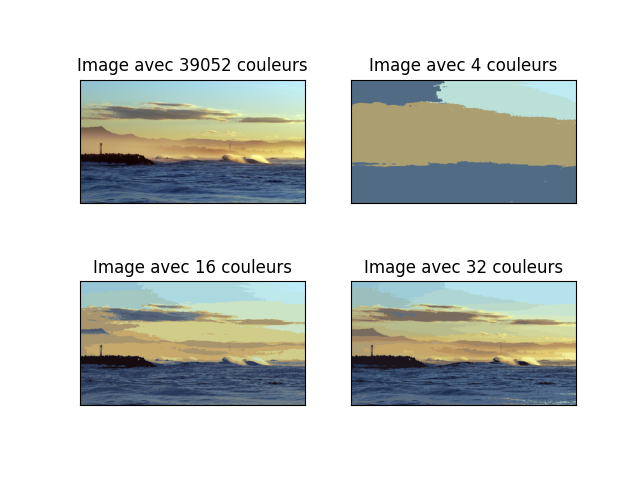

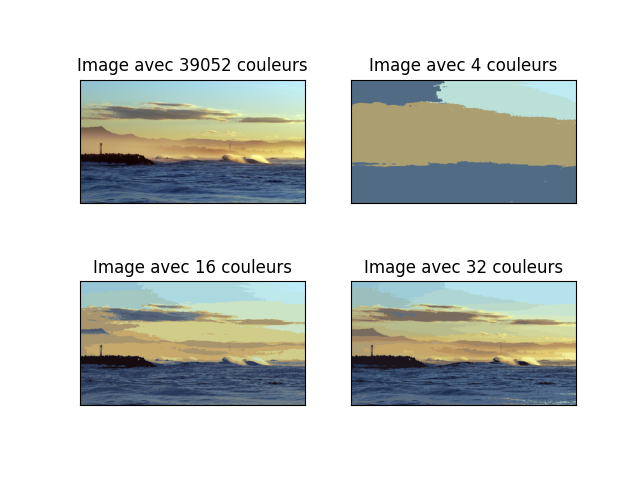

In [37]:
fix,axs=pl.subplots(2,2)
axs[0,0].imshow(img)
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,0].set_title("Image avec {} couleurs".format(trouve_couleur(img)))
for ind,ax in enumerate(axs.ravel()[1:]):
    ax.imshow(img_reduite[ind])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Image avec {} couleurs".format(lk[ind]))
    
fix.show()